# DPCN Assignment 2
## Team 6
- Tathagato Roy, 2019111020
- Abhishek Mittal , 
- Adwait Raste,

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import math


In [2]:
SEED = 42
random.seed(SEED)

## Q2. 
Construct a complex network of size N =1000. At first, store the size of the largest connected component (GCC) of that network. Then remove randomly chosen
nodes by a small fraction (f) from that network and consider the largest connected component as the new network (eliminating all nodes which are now isolated after deletion). Plot the relative size of the largest connected
components (ξ = size ofN GCC ) with respect to the fraction of node removed (f).

Graph following Poisson distribution of degree for large graphs is given the Erdos-Renyl Graph.
The second type of Graph is the Scale Free Graph

In [9]:
N = 1000
max_nodes_to_be_removed = 0.9 * N
#p = [0.5, 0.25, 0.60, 0.75]
average_degree = [4]
colors = ['red','green','cyan','blue','black']    

def get_expected_probability_of_an_edge(N,k):
    """ given N size of the network and average degree 
        computes the probability of an edge between any 
        two nodes for Erdos Renyl Graphs """
    return k / (N - 1)
def construct_erdos_renyl(n, deg , seed = SEED):
    G = nx.erdos_renyi_graph(n, get_expected_probability_of_an_edge(n,deg), seed = seed)
    return G
def construct_scale_free_graph(n, m, seed = SEED):
    G = nx.barabasi_albert_graph(n, m, seed = SEED)
    return G
def generate_random_nodes_to_be_removed(f,n):
    """ generate f nodes to be removed without replacement from a graph of N nodes """
    return np.random.choice(n, f, replace = False)

def compute_relative_size_of_largest_connected_component(G, N):
    cc_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse = True)]
    #print("Number of Connected components : {0}".format(len(cc_sizes)))
    size = G.number_of_nodes()
    #print("size of the Graph : {0}  and size of the largest component : {1}".format(size,cc_sizes[0] ))
    return cc_sizes[0] / size

def compute_triangle(G):

    num_triangles = nx.triangles(G)
    total_triangles = 0
    for key in num_triangles:
        total_triangles += num_triangles[key]
    return total_triangles / 3
def generate_average_shortest_path(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    return nx.average_shortest_path_length(G0)
    

def generate_gcc_num_triangles_vs_f_data(G, nodes_to_be_removed):
    """ generate gcc against ratio f """ 
    size = 0
    original_size = G.number_of_nodes()
    f = []
    relative_size_of_gcc = []
    triangles = []
    average_shortest_paths = []
    max_removed = len(nodes_to_be_removed)
    for i in range(max_removed):
        node = nodes_to_be_removed[i]
        #print("removing node : {0}".format(node))
        G.remove_node(node)
        #num_triangles = compute_triangle(G)
        ratio = (i+1) / N
        average_shortest_path = generate_average_shortest_path(G)
        #relative_size = compute_relative_size_of_largest_connected_component(G, original_size)
        relative_size_of_gcc.append(0)
        average_shortest_paths.append(average_shortest_path)
        f.append(ratio)
        triangles.append(0)
        #print("Number of Nodes removed : {0} and the relative GCC size : {1}".format(ratio, relative_size))
        if i % 499 == 0:
            print("Progress : {0}".format(i*100 / len(nodes_to_be_removed)))
    
    return f, triangles, relative_size_of_gcc, average_shortest_paths


def generate_data_for_Erdos_Renyi():
    Triangles = []
    F = []
    Gcc_Size = []
    Average_Shortest_Lengths = []
    for i, deg in enumerate(average_degree):
        G = construct_erdos_renyl(N,deg)
        nodes_to_be_removed = generate_random_nodes_to_be_removed(int(max_nodes_to_be_removed), N)
        print(G.number_of_nodes())
        f, triangles, relative_size_of_gcc, average_shortest_lengths = generate_gcc_num_triangles_vs_f_data(G, nodes_to_be_removed)
        F.append(f)
        Triangles.append(triangles)
        Gcc_Size.append(relative_size_of_gcc)
        Average_Shortest_Lengths.append(average_shortest_lengths)

    return F, Triangles, Gcc_Size, Average_Shortest_Lengths
def generate_data_for_Scale_Free():
    Triangles = []
    F = []
    Gcc_Size = []
    Average_Shortest_Lengths = []

    for i, deg in enumerate(average_degree):
        G = construct_scale_free_graph(N, deg // 2)
        nodes_to_be_removed = generate_random_nodes_to_be_removed(int(max_nodes_to_be_removed), N)
        print(G.number_of_nodes())
        f, triangles, relative_size_of_gcc, average_shortest_lengths = generate_gcc_num_triangles_vs_f_data(G, nodes_to_be_removed)
        F.append(f)
        Average_Shortest_Lengths.append(average_shortest_lengths)
        Triangles.append(triangles)
        Gcc_Size.append(relative_size_of_gcc)
    return F, Triangles, Gcc_Size, Average_Shortest_Lengths

def Draw_GCC_Figures(F, Gcc_Size, graph_type = "Erdos Renyi"):
    #print(Gcc_Size[1])
    #print(Gcc_Size[2])





    for i,deg in enumerate(average_degree):
            plt.plot(F[i], Gcc_Size[i], color = colors[i], label = "average degree = " + str(deg))
            plt.legend()
            plt.xlabel("F (ratio of node removed)")
            plt.ylabel("Relative Size of the Largest Components")
            plt.title("Relative Size vs F  for " + graph_type)
            plt.xlim(0,1.10)


def Draw_Triangle_Figures(F, Triangles, graph_type = "Erdos Renyi"):
        for i,deg in enumerate(average_degree):
            plt.plot(F[i], Triangles[i], color = colors[i], label = "average degree = " + str(deg))
            plt.legend()
            plt.xlabel("F (ratio of node removed)")
            plt.ylabel("Number of Triangles")
            plt.title("Number of Triangles vs F for " + graph_type)
            plt.xlim(0,1.10)

def Draw_Shortest_Figures(F, SPs, graph_type = "Erdos Renyi"):
        max_x = 0
        for i,deg in enumerate(average_degree):
            if len(F[i]) > 0:   
                plt.plot(F[i], SPs[i], color = colors[i], label = "average degree = " + str(deg))
                plt.legend()
                max_x = max(max_x, max(F[i]))
        
        plt.xlabel("F (ratio of node removed)")
        plt.ylabel("Average Shortest Path")
        plt.title("Average Shortest Path vs F for " + graph_type)
        plt.xlim(0, max_x + 0.05)





        
        
    
        

        
    


    
    

        
        
        
    
    
    
    
    


In [10]:
print("Erdos Renyi")
F1, Triangles1, Gcc_Size1, Average_Shortest_Lengths1 = generate_data_for_Erdos_Renyi()

Erdos Renyi
1000
Progress : 0.0
Progress : 22.22222222222222
Progress : 44.44444444444444


In [10]:
print("Scale Free")
F2, Triangles2, Gcc_Size2, Average_Shortest_Lengths2 = generate_data_for_Scale_Free()


Scale Free
1000
Progress : 0.0
Progress : 55.44444444444444
1000
Progress : 0.0
Progress : 55.44444444444444
1000
Progress : 0.0
Progress : 55.44444444444444


In [11]:
gtype_1 = "Erdos Renyi"
gtype_2 = "Scale Free Network"

### Scale Free

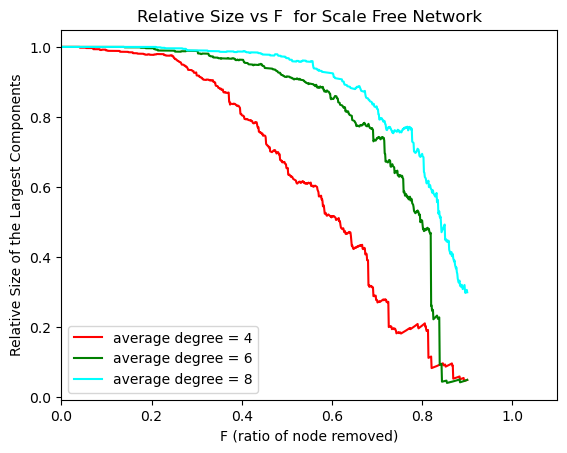

In [12]:
Draw_GCC_Figures(F2, Gcc_Size2, graph_type = gtype_2)

### Erdos Renyl

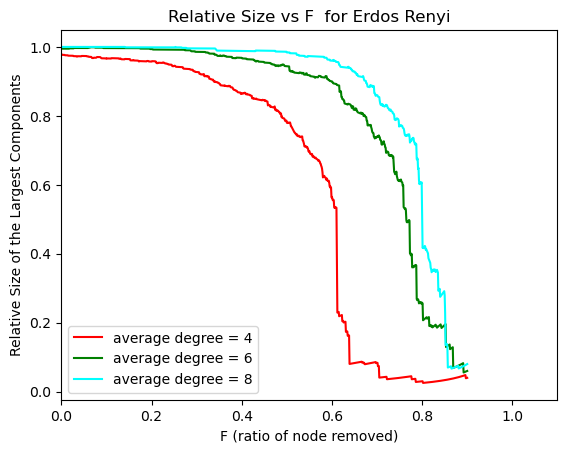

In [13]:
Draw_GCC_Figures(F1, Gcc_Size1)

### (a) What is the critical value (fc ) of f , in which ξ will reach to zero (Note: There will be significant jump in the size of GCC around that critical point)?


For Erdos Renyl Graph with Average Degree 
$$\text{Degree : } 4 \text{  }   f_c = 0.7$$
$$\text{Degree : } 6 \text{  }   f_c = 0.8$$
$$\text{Degree : } 8 \text{  }   f_c = 0.8$$

For Scale Free Graph with Average Degree 
$$\text{Degree : } 4 \text{  }   f_c = 0.9$$
$$\text{Degree : } 6 \text{  }   f_c = 0.9$$
$$\text{Degree : } 8 \text{  }   f_c = 0.9$$


### (b) Plot the number of triangles exist in largest giant components with respect to f .

### Erdos Renyii


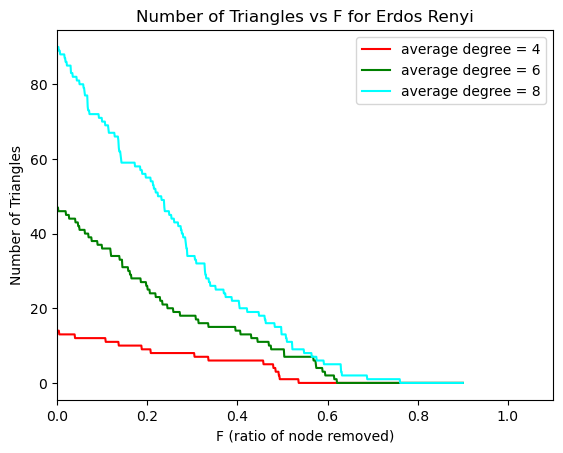

In [14]:
Draw_Triangle_Figures(F1, Triangles1, graph_type = "Erdos Renyi")

### Scale Free

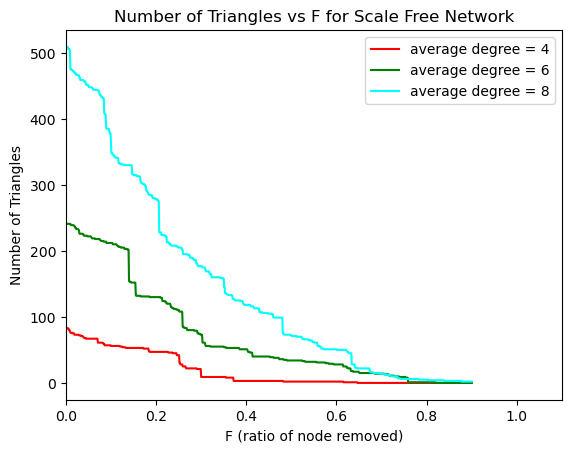

In [15]:
Draw_Triangle_Figures(F2, Triangles2, graph_type = gtype_2)

### (c) Plot a graph of average path-length vs f . Use two types of graphs : (I) random graph following Poissonian degree distribution (II) scale free network.

In [35]:
def filter(Average_Shortest_Lengths, F):
    final_shortest_length = []
    final_f = []
    for i in range(len(Average_Shortest_Lengths)):
        filtered_shortest_length = []
        filter_f = []
        for j , val in enumerate(Average_Shortest_Lengths[i]):
            if val == N + 1000:
                #filtered_shortest_length.append(val)
                #filter_f.append(F[i][j])
                break
            else:
                filtered_shortest_length.append(val)
                filter_f.append(F[i][j])
        final_shortest_length.append(filtered_shortest_length)
        final_f.append(filter_f)
    return final_shortest_length, final_f

Filtered_Average_Shortest_Lengths1 , new_F1 = filter(Average_Shortest_Lengths1, F1)
Filtered_Average_Shortest_Lengths2, new_F2 = filter(Average_Shortest_Lengths2, F2)



### Erdos Renyi

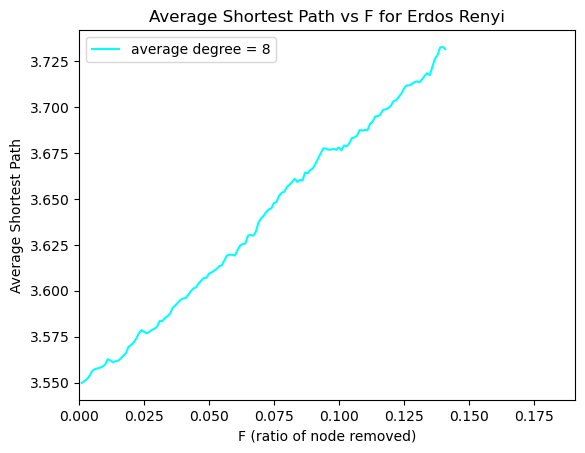

In [41]:
Draw_Shortest_Figures(new_F1, Filtered_Average_Shortest_Lengths1, graph_type = "Erdos Renyi")

### Scale Free Networks 

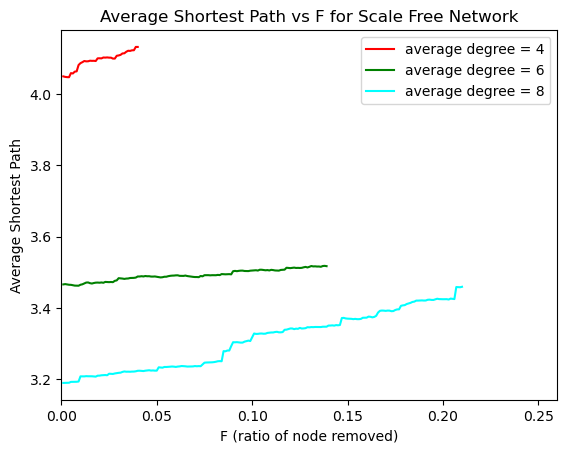

In [42]:
Draw_Shortest_Figures(new_F2, Filtered_Average_Shortest_Lengths2, graph_type = gtype_2)

In [ ]:
print(len(Average_Shortest_Lengths1))
print(Average_Shortest_Lengths1[2])


## Q4. Create a random graph of size N =1000 by using two protocols:
(I) Create a null graph of N , and then connect edges by a probability p.  
(II) Create a global graph (all to all connected) of N , and remove edges by the given probability p.


### part (i)
#### (a) Construct random graphs with probabilities p=0.1, 0.5 and 0.8.
#### (b) Plot the largest giant component of the graphs with respect to p (0 to 1)

Text(0.5, 1.0, 'size of largest connected component vs p for Erdos Renyi')

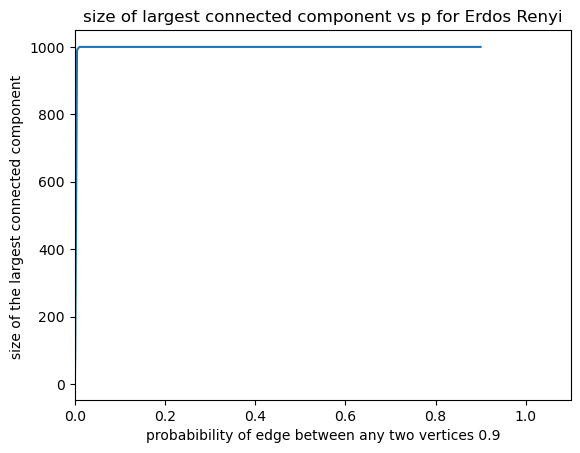

In [12]:
N = 1000
ps = [0.0001, 0.001, 0.005, 0.01, 0.05,0.1, 0.2,0.5,0.8,0.9]
largest_giant_component_ratio = []
for i,p in enumerate(ps):
    G = nx.erdos_renyi_graph(N,p)
    cc_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse = True)]
    #print("Number of Connected components : {0}".format(len(cc_sizes)))
    #print("size of the Graph : {0}  and size of the largest component : {1}".format(size,cc_sizes[0] ))
    #print(cc_sizes[0])
    largest_giant_component_ratio.append(cc_sizes[0])

plt.plot(ps, largest_giant_component_ratio)
plt.xlabel("probabibility of edge between any two vertices " + str(p))
plt.ylabel("size of the largest connected component ")
plt.xlim(0,1.10)
plt.title("size of largest connected component vs p for Erdos Renyi")
    

### (b) Plot the largest giant component of the graphs with respect to p (0 to 1).

In [23]:
ps = [0.0001, 0.001, 0.005, 0.01, 0.05,0.1, 0.2,0.5,0.8,0.9,0.999]

def construct_fully_connected_graph_adj(N):
    return np.ones((N,N))
#v = construct_fully_connected_graph_adj(N)

def remove_edges_with_probability_p(adj,p):
    V = adj.shape[0]
    for i in range(V):
        for j in range(V):
            if np.random.uniform(0,1) < p:
                adj[i,j] = 0
    return adj

def Generate_Graph(N,p):
    adj = construct_fully_connected_graph_adj(N)
    adj = remove_edges_with_probability_p(adj,p)
    print("print sum : " + str(adj.sum()))
    G = nx.from_numpy_matrix(adj)
    return G

data = []
for i,p in enumerate(ps):
    G = Generate_Graph(N,p)

    cc_sizes = [len(c) for c in sorted(nx.connected_components(G), key = len, reverse = True)]
#print("Number of Connected components : {0}".format(len(cc_sizes)))
#print("size of the Graph : {0}  and size of the largest component : {1}".format(size,cc_sizes[0] ))
#print(cc_sizes[0])
    data.append(cc_sizes[0])


    
        
    

                

print sum : 999896.0
print sum : 998931.0
print sum : 994976.0
print sum : 989858.0
print sum : 950105.0
print sum : 900249.0
print sum : 800264.0
print sum : 499925.0
print sum : 199631.0
print sum : 100172.0
print sum : 1022.0


Text(0.5, 1.0, 'size of largest connected component vs p for Second type of Random Graph')

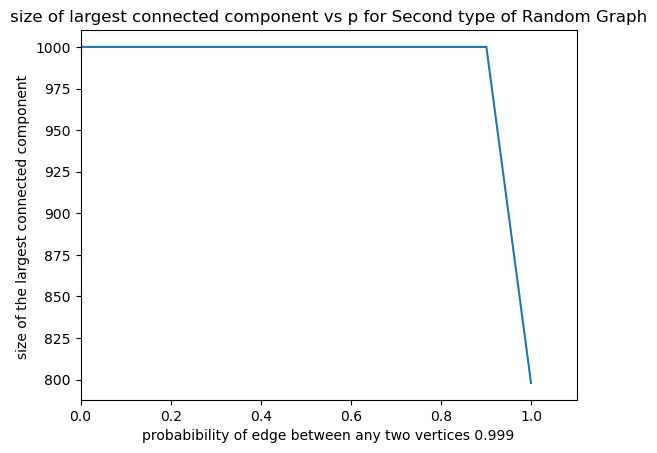

In [24]:
plt.plot(ps, data)
plt.xlabel("probabibility of edge between any two vertices " + str(p))
plt.ylabel("size of the largest connected component ")
plt.xlim(0,1.10)
plt.title("size of largest connected component vs p for Second type of Random Graph")

print(len(data))
print(len(ps))